<a href="https://colab.research.google.com/github/ikhsan-muhammad/p01-airplane_cargo/blob/main/p01-airplane-cargo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airplane Cargo Analysist

<img src="https://indianonlineseller.com/images/blogs/editor/amazon-transportation-services-helping-hand-or-grabbing-hand.jpg" alt="Flowers in Chania" style="border-radius: 15px 15px 15px 15px;"/>

**Metadata:**

https://data.sfgov.org/Transportation/Air-Traffic-Cargo-Statistics/u397-j8nr/about_data [san francisco air cargo data]

# Set-UP

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# # pull data from kaggle datasets
# ! pip install kaggle
# ! mkdir ~/.kaggle
# ! cp /content/drive/MyDrive/Colab\ Notebooks/kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets download ikhsanmhmd/air-traffic-cargo-statistic
# ! unzip /content/air-traffic-cargo-statistic.zip
# ! rm /content/air-traffic-cargo-statistic.zip

# Data Wrangling

## Import

In [4]:
#import necessary library
import pandas as pd
pd.plotting.register_matplotlib_converters
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import nbformat as nb

#set all things that needed
pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_rows',200)
pd.reset_option('display.max_rows')
# plt.style.use('dark_background')
plt.style.use('default')

# with kaggle
# df = pd.read_csv('/kaggle/input/air-traffic-cargo-statistic/Air_Traffic_Cargo_Statistics.csv', parse_dates=[1,13,14], date_format='mixed')
# with colab
# df = pd.read_csv('/content/drive/MyDrive/Ori Data Import/Air_Traffic_Cargo_Statistics.csv', parse_dates=[1,13,14], date_format='mixed')
# local
df = pd.read_csv('D:/.project/p01-airplane_cargo/Air_Traffic_Cargo_Statistics.csv', parse_dates=[1,13,14], date_format='mixed')

In [5]:
# df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55038 entries, 0 to 55037
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Activity Period              55038 non-null  int64         
 1   Activity Period Start Date   55038 non-null  datetime64[ns]
 2   Operating Airline            55038 non-null  object        
 3   Operating Airline IATA Code  54460 non-null  object        
 4   Published Airline            55038 non-null  object        
 5   Published Airline IATA Code  54460 non-null  object        
 6   GEO Summary                  55038 non-null  object        
 7   GEO Region                   55038 non-null  object        
 8   Activity Type Code           55038 non-null  object        
 9   Cargo Type Code              55038 non-null  object        
 10  Cargo Aircraft Type          55038 non-null  object        
 11  Cargo Weight LBS             55038 non-nu

In [6]:
df.head()

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS,Cargo Metric TONS,data_as_of,data_loaded_at
0,199907,1999-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Cargo,Passenger,349048,158.328173,2024-06-20 13:00:06,2024-06-22 15:01:45
1,199907,1999-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Mail,Passenger,122003,55.340561,2024-06-20 13:00:06,2024-06-22 15:01:45
2,199907,1999-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Cargo,Passenger,514450,233.354520,2024-06-20 13:00:06,2024-06-22 15:01:45
3,199907,1999-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Mail,Passenger,89776,40.722394,2024-06-20 13:00:06,2024-06-22 15:01:45
4,199907,1999-07-01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Cargo,Passenger,13086,5.935810,2024-06-20 13:00:06,2024-06-22 15:01:45


In [7]:
#select all columns that we need
selected_df = df[[
#     'Activity Period',
    'Activity Period Start Date',
    'Operating Airline',
#     'Operating Airline IATA Code',
    'Published Airline',
#     'Published Airline IATA Code',
    'GEO Summary',
    'GEO Region',
    'Activity Type Code',
    'Cargo Type Code',
    'Cargo Aircraft Type',
    'Cargo Weight LBS',
    # 'Cargo Metric TONS',
#     'data_as_of',
#     'data_loaded_at'
]].copy()

selected_df

,Activity Period Start Date,Operating Airline,Published Airline,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS
0,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Cargo,Passenger,349048
1,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Mail,Passenger,122003
2,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Cargo,Passenger,514450
3,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Mail,Passenger,89776
4,1999-07-01,Aeroflot Russian International Airlines,Aeroflot Russian International Airlines,International,Europe,Deplaned,Cargo,Passenger,13086
...,...,...,...,...,...,...,...,...,...
55033,2024-04-01,Vietnam Airlines JSC,Vietnam Airlines JSC,International,Asia,Enplaned,Cargo,Passenger,19323
55034,2024-04-01,Virgin Atlantic,Virgin Atlantic,International,Europe,Deplaned,Cargo,Passenger,414753
55035,2024-04-01,Virgin Atlantic,Virgin Atlantic,International,Europe,Enplaned,Cargo,Passenger,174269
55036,2024-04-01,ZIPAIR Tokyo Inc,ZIPAIR Tokyo Inc,International,Asia,Deplaned,Cargo,Passenger,845137


In [8]:
#change all columns name
selected_df = selected_df.rename(columns={
    'Activity Period Start Date' : 'period',
    'Operating Airline' : 'operating_airline',
    'Published Airline' : 'published_airline',
    'GEO Summary' : 'geo_summary',
    'GEO Region' : 'geo_region',
    'Activity Type Code' : 'activity_type',
    'Cargo Type Code' : 'cargo_type',
    'Cargo Aircraft Type' : 'aircraft_type',
    'Cargo Weight LBS' : 'lbs'
}) # type: ignore

selected_df

,period,operating_airline,published_airline,geo_summary,geo_region,activity_type,cargo_type,aircraft_type,lbs
0,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Cargo,Passenger,349048
1,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Mail,Passenger,122003
2,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Cargo,Passenger,514450
3,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Mail,Passenger,89776
4,1999-07-01,Aeroflot Russian International Airlines,Aeroflot Russian International Airlines,International,Europe,Deplaned,Cargo,Passenger,13086
...,...,...,...,...,...,...,...,...,...
55033,2024-04-01,Vietnam Airlines JSC,Vietnam Airlines JSC,International,Asia,Enplaned,Cargo,Passenger,19323
55034,2024-04-01,Virgin Atlantic,Virgin Atlantic,International,Europe,Deplaned,Cargo,Passenger,414753
55035,2024-04-01,Virgin Atlantic,Virgin Atlantic,International,Europe,Enplaned,Cargo,Passenger,174269
55036,2024-04-01,ZIPAIR Tokyo Inc,ZIPAIR Tokyo Inc,International,Asia,Deplaned,Cargo,Passenger,845137


In [9]:
#Always run this cell one time, cant do it twice
selected_df['period'] = selected_df['period'].dt.to_period('M')
selected_df

,period,operating_airline,published_airline,geo_summary,geo_region,activity_type,cargo_type,aircraft_type,lbs
0,1999-07,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Cargo,Passenger,349048
1,1999-07,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Mail,Passenger,122003
2,1999-07,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Cargo,Passenger,514450
3,1999-07,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Mail,Passenger,89776
4,1999-07,Aeroflot Russian International Airlines,Aeroflot Russian International Airlines,International,Europe,Deplaned,Cargo,Passenger,13086
...,...,...,...,...,...,...,...,...,...
55033,2024-04,Vietnam Airlines JSC,Vietnam Airlines JSC,International,Asia,Enplaned,Cargo,Passenger,19323
55034,2024-04,Virgin Atlantic,Virgin Atlantic,International,Europe,Deplaned,Cargo,Passenger,414753
55035,2024-04,Virgin Atlantic,Virgin Atlantic,International,Europe,Enplaned,Cargo,Passenger,174269
55036,2024-04,ZIPAIR Tokyo Inc,ZIPAIR Tokyo Inc,International,Asia,Deplaned,Cargo,Passenger,845137


In [10]:
selected_df['operating_airline'].value_counts().sort_index()

operating_airline
21 Air, LLC             28
ABX Air                346
ASTAR USA, LLC          16
ATA Airlines           324
Active Aero Charter      2
                      ... 
Virgin America           5
Virgin Atlantic        718
WOW Air                 55
World Airways           36
ZIPAIR Tokyo Inc        17
Name: count, Length: 132, dtype: int64

In [11]:
#see all airline names contain (,)
selected_df['operating_airline'].loc[selected_df['operating_airline'].str.contains(',')].value_counts().index

Index(['All Nippon Company Airways, Ltd.', 'TACA International Airlines, S.A.',
       'Aer Lingus, Ltd.', 'Atlas Air, Inc', 'COPA Airlines, Inc.',
       'Air Transport International, Inc.', 'Atlas Air, Inc. (inactive)',
       'China Eastern Airlines, Inc', 'Emery Worldwide Airlines, Inc.',
       '21 Air, LLC', 'ASTAR USA, LLC', 'Air Transport International, LLC.',
       'Total Airport Services, Inc. (Inactive)', 'Norse Atlantic UK, Ltd.',
       'Envoy Air, Inc.'],
      dtype='object', name='operating_airline')

In [12]:
#remove extension from airlines name
def airline_name_cleaner(selected_df):
    selected_df = selected_df.replace(r'\bInc\b|\bLLC\b|\bLimited\b|\bLtd\b|\binactive\b|\bPre 07/01/2013\b|\bbecame Delta\b|\bLTD\b|\bGmbH\b|\bEHF\b|\bASA\b|\bCO\b|\bJSC\b|\bSPA\b|\bSA\b', '',regex=True).copy()
    selected_df = selected_df.replace(r'\([^)]*\)|[-,.]', '', regex=True)
    selected_df['operating_airline'] = selected_df['operating_airline'].apply(lambda x: x.strip() if isinstance(x, str) else x)
    return selected_df

selected_df = airline_name_cleaner(selected_df)
selected_df['operating_airline'].value_counts().sort_index()

operating_airline
21 Air                  28
ABX Air                346
ASTAR USA               16
ATA Airlines           324
Active Aero Charter      2
                      ... 
Virgin America           5
Virgin Atlantic        718
WOW Air                 55
World Airways           36
ZIPAIR Tokyo            17
Name: count, Length: 128, dtype: int64

In [13]:
selected_df['operating_airline'].value_counts().sort_index()

operating_airline
21 Air                  28
ABX Air                346
ASTAR USA               16
ATA Airlines           324
Active Aero Charter      2
                      ... 
Virgin America           5
Virgin Atlantic        718
WOW Air                 55
World Airways           36
ZIPAIR Tokyo            17
Name: count, Length: 128, dtype: int64

In [14]:
selected_df.describe()

,lbs
count,5.503800e+04
mean,5.204636e+05
std,1.023128e+06
min,1.000000e+00
25%,1.936650e+04
50%,1.442165e+05
75%,5.915170e+05
max,2.381234e+07


In [15]:
selected_df.describe(include='object')

,operating_airline,published_airline,geo_summary,geo_region,activity_type,cargo_type,aircraft_type
count,55038,55038,55038,55038,55038,55038,55038
unique,128,118,2,9,2,3,3
top,United Airlines,United Airlines,International,Asia,Deplaned,Cargo,Passenger
freq,9455,4970,38475,19314,28117,30675,45285


In [16]:
selected_df

,period,operating_airline,published_airline,geo_summary,geo_region,activity_type,cargo_type,aircraft_type,lbs
0,1999-07,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Cargo,Passenger,349048
1,1999-07,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Mail,Passenger,122003
2,1999-07,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Cargo,Passenger,514450
3,1999-07,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Mail,Passenger,89776
4,1999-07,Aeroflot Russian International Airlines,Aeroflot Russian International Airlines,International,Europe,Deplaned,Cargo,Passenger,13086
...,...,...,...,...,...,...,...,...,...
55033,2024-04,Vietnam Airlines,Vietnam Airlines,International,Asia,Enplaned,Cargo,Passenger,19323
55034,2024-04,Virgin Atlantic,Virgin Atlantic,International,Europe,Deplaned,Cargo,Passenger,414753
55035,2024-04,Virgin Atlantic,Virgin Atlantic,International,Europe,Enplaned,Cargo,Passenger,174269
55036,2024-04,ZIPAIR Tokyo,ZIPAIR Tokyo,International,Asia,Deplaned,Cargo,Passenger,845137


In [35]:
selected_df.to_csv('airplane_cargo.csv', index=False)

In [18]:
selected_df['period'] = selected_df['period'].dt.to_timestamp()

## Exploratory Data Analysis (EDA)

In [19]:
selected_df['year'] = selected_df.period.dt.year
selected_df['month'] = selected_df.period.dt.month
selected_df['quarter'] = selected_df.period.dt.to_period('Q')
selected_df

,period,operating_airline,published_airline,geo_summary,geo_region,activity_type,cargo_type,aircraft_type,lbs,year,month,quarter
0,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Cargo,Passenger,349048,1999,7,1999Q3
1,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Mail,Passenger,122003,1999,7,1999Q3
2,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Cargo,Passenger,514450,1999,7,1999Q3
3,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Mail,Passenger,89776,1999,7,1999Q3
4,1999-07-01,Aeroflot Russian International Airlines,Aeroflot Russian International Airlines,International,Europe,Deplaned,Cargo,Passenger,13086,1999,7,1999Q3
...,...,...,...,...,...,...,...,...,...,...,...,...
55033,2024-04-01,Vietnam Airlines,Vietnam Airlines,International,Asia,Enplaned,Cargo,Passenger,19323,2024,4,2024Q2
55034,2024-04-01,Virgin Atlantic,Virgin Atlantic,International,Europe,Deplaned,Cargo,Passenger,414753,2024,4,2024Q2
55035,2024-04-01,Virgin Atlantic,Virgin Atlantic,International,Europe,Enplaned,Cargo,Passenger,174269,2024,4,2024Q2
55036,2024-04-01,ZIPAIR Tokyo,ZIPAIR Tokyo,International,Asia,Deplaned,Cargo,Passenger,845137,2024,4,2024Q2


### Plot

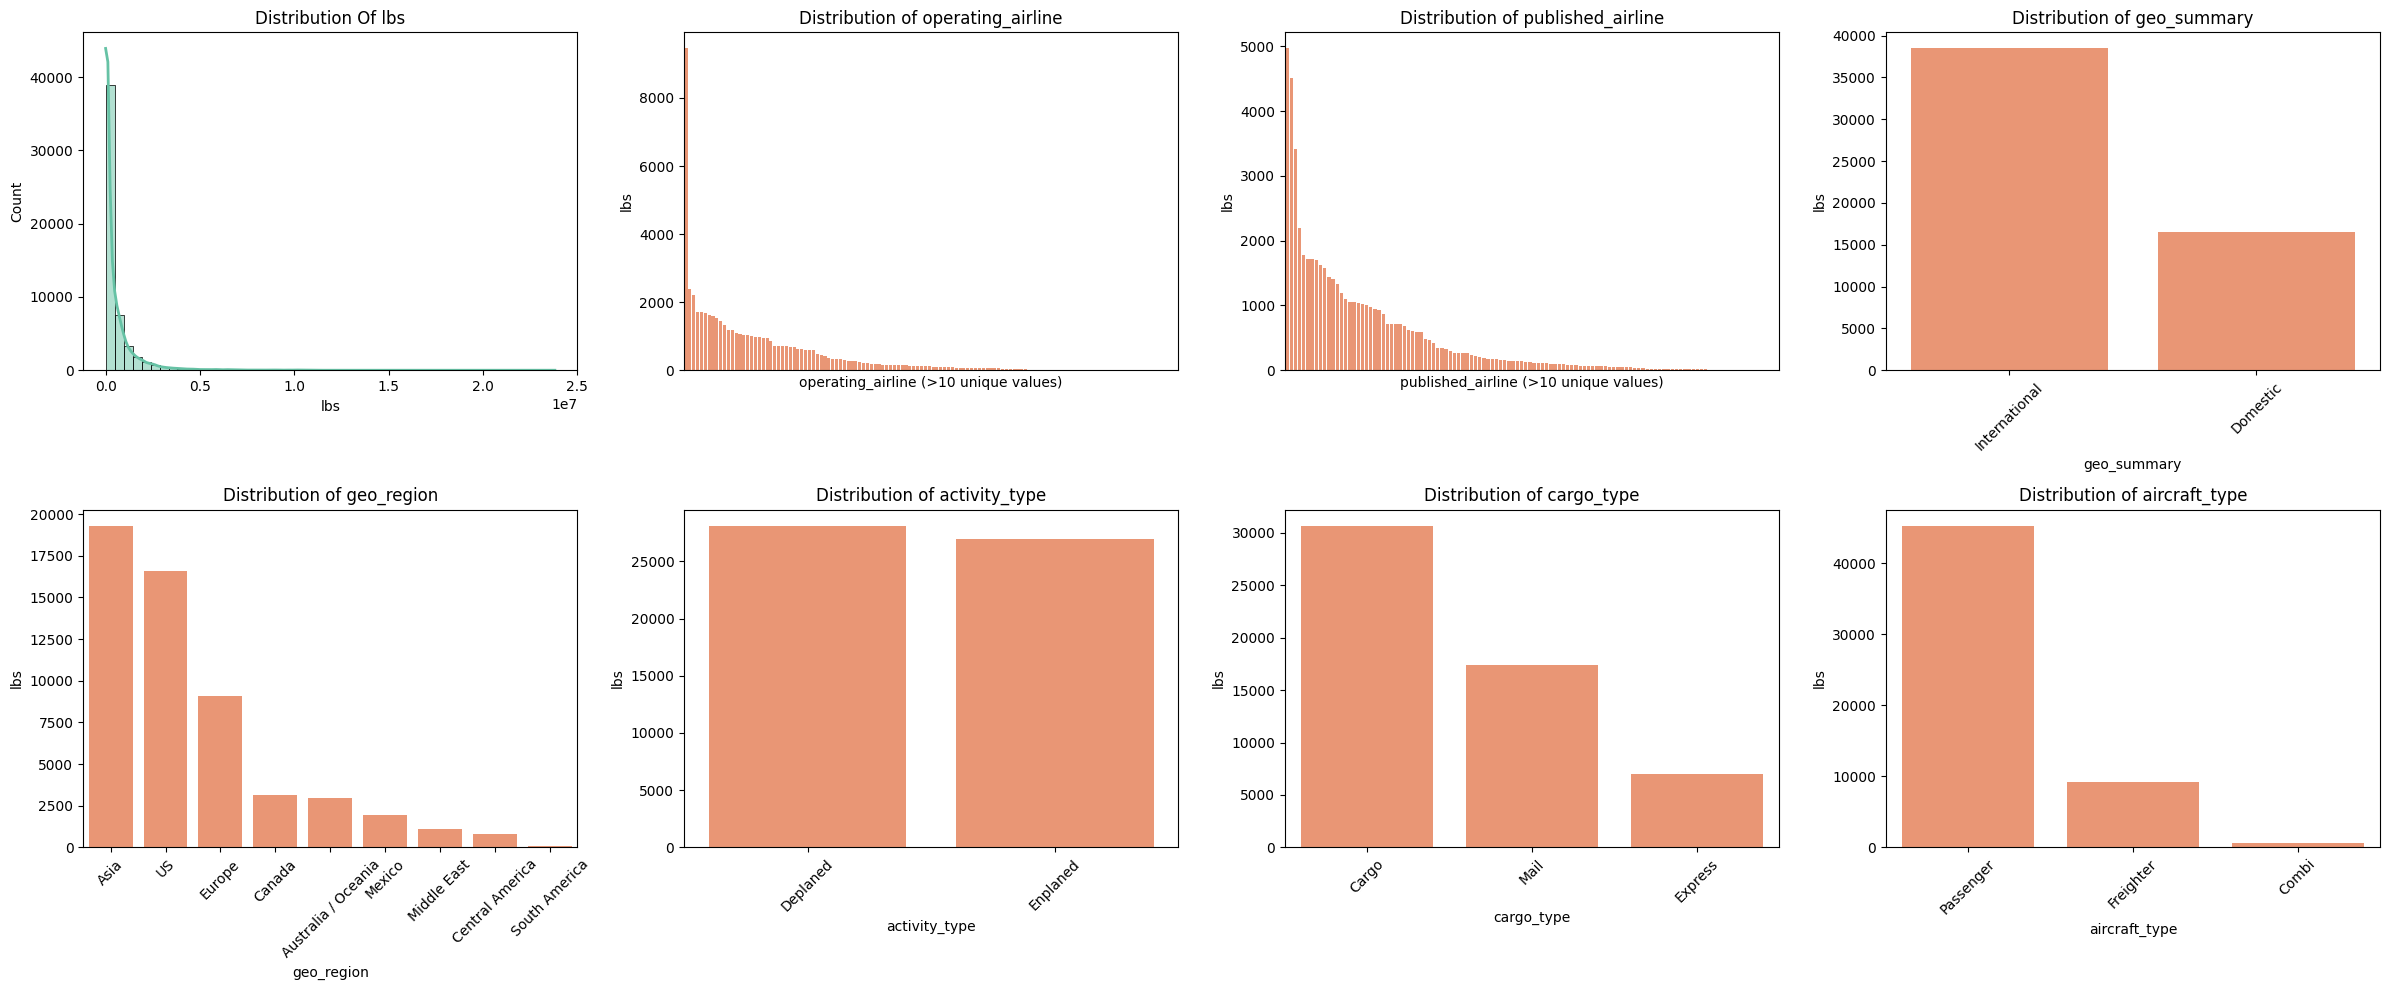

In [20]:
def feature_distributions(data, target='lbs', n_cols=4):
    features = [col for col in data.columns if col != 'period' and col != target and col != 'year' and col != 'month' and col != 'quarter']
    
    n_rows = int(np.ceil(len(features)+1)/n_cols)

    fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*6,n_rows*5))
    ax = ax.flatten()

    # Plot Price Distribution
    sns.histplot(data=data, x=target, kde=True, bins=50, ax=ax[0], color='#66c2a5', line_kws={'color': '#8da0cb', 'linewidth': 2})
    ax[0].set_title(f'Distribution Of {target}')
    ax[0].set_xlabel(target)
    ax[0].set_ylabel('Count')

    # Plot Feature Distribution
    for idx, col in enumerate(features, start=1):
        # Plot build for categorical values
        value_counts = data[col].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax[idx], color='#fc8d62')
        ax[idx].set_title(f'Distribution of {col}')
        ax[idx].set_xlabel(col)
        ax[idx].set_ylabel(target)

        # Hide X label for feature with more than 10 unique values
        if data[col].nunique()>10:
            ax[idx].set_xticks([])
            ax[idx].set_xlabel(f'{col} (>10 unique values)')
        else:
            ax[idx].tick_params(axis='x', rotation=45)

    # Remove ax that we don't use
    for i in range(len(features)+1,len(ax)):
        print(i)
        fig.delaxes(ax[i])

    plt.tight_layout()
    plt.show()

feature_distributions(selected_df)

### Between 1999 to 2024, which airline get increased air traffic cargo? Which get less air traffic cargo?

In [21]:
pivot_data = selected_df.pivot_table(index='operating_airline',
                                    columns='quarter',
                                    values='lbs',
                                    aggfunc='sum')
pivot_data = pivot_data.reset_index()
pivot_data


quarter,operating_airline,1999Q3,1999Q4,2000Q1,2000Q2,2000Q3,2000Q4,2001Q1,2001Q2,2001Q3,2001Q4,2002Q1,2002Q2,2002Q3,2002Q4,2003Q1,2003Q2,2003Q3,2003Q4,2004Q1,2004Q2,2004Q3,2004Q4,2005Q1,2005Q2,2005Q3,2005Q4,2006Q1,2006Q2,2006Q3,2006Q4,2007Q1,2007Q2,2007Q3,2007Q4,2008Q1,2008Q2,2008Q3,2008Q4,2009Q1,2009Q2,2009Q3,2009Q4,2010Q1,2010Q2,2010Q3,2010Q4,2011Q1,2011Q2,2011Q3,...,2012Q1,2012Q2,2012Q3,2012Q4,2013Q1,2013Q2,2013Q3,2013Q4,2014Q1,2014Q2,2014Q3,2014Q4,2015Q1,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1,2023Q2,2023Q3,2023Q4,2024Q1,2024Q2
0,21 Air,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1856072.0,7924743.0,7633163.0,7976823.0,7254148.0,2355200.0
1,ABX Air,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,298621.0,611244.0,421266.0,428263.0,2001688.0,5307391.0,9390885.0,11937136.0,16969746.0,15380592.0,14967988.0,12152720.0,12410776.0,12537200.0,12955879.0,12628998.0,13952647.0,10052484.0,10511723.0,10458205.0,11104959.0,12804887.0,10811557.0,12790455.0,14355744.0,14465937.0,12820783.0,14412554.0,14269788.0,...,13201411.0,10996156.0,4830581.0,5040051.0,4761096.0,4536244.0,7892015.0,11301502.0,9374281.0,12466128.0,12624103.0,15003004.0,11140529.0,4835918.0,102238.0,409470.0,NaN,NaN,NaN,NaN,NaN,103525.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76338.0,NaN,NaN,NaN,NaN,NaN,NaN,1684089.0,8888922.0,11030816.0,10704548.0,11569954.0,7930397.0,12409640.0,23880704.0,15428340.0,11414615.0,11381796.0,12004809.0,8927223.0,3903012.0
2,ASTAR USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,970859.0,483798.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ATA Airlines,2494887.0,1802337.0,1684188.0,2319548.0,2519333.0,1772399.0,1226267.0,1776608.0,1241206.0,920987.0,723639.0,681641.0,649152.0,461845.0,943183.0,1154121.0,1981764.0,2821266.0,1843312.0,2101383.0,2027881.0,2049364.0,1937192.0,1768463.0,1384682.0,1083119.0,1024044.0,156851.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Active Aero Charter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,555052.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Virgin America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41684.0,24863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [22]:
pivot_data = pivot_data[pivot_data.notna().all(axis=1)]

In [23]:

# plot line 1

# monthly_traffic = selected_df.groupby(['period','operating_airline'])['lbs'].sum().reset_index()
all_airline_traffic = selected_df.groupby([selected_df.year,'operating_airline'])['lbs'].sum().reset_index()

px.line(all_airline_traffic,
        x='year',
        y='lbs',
        color='operating_airline',
        title='Tren Cargo Airlines (lbs) per year',
        markers=True).show()

# plot line 2
pivot_table_melted = pivot_data.melt(id_vars=['operating_airline'], 
                                            var_name='quarter', 
                                            value_name='total_lbs')
pivot_table_melted.quarter = pivot_table_melted.quarter.astype(str)

fig = px.line(pivot_table_melted, 
              x='quarter', 
              y='total_lbs', 
              color='operating_airline', 
              labels={'total_lbs':'Total lbs', 'year':'Year', 'operating_airline':'Airline'},
              title='Tren Cargo Airlines (lbs) per year for Active Airlines')

# for trace in fig.data:
#     if trace.name == 'Nama_Airline_Tertentu':  # Ganti dengan nama airline yang ingin disorot
#         trace.line.width = 5  # Lebar garis lebih besar
#         trace.line.color = 'red'  # Warna garis lebih mencolok
#     else:
#         trace.line.width = 1  # Garis lain lebih tipis
#         trace.line.color = 'gray'  # Garis lain berwarna abu-abu

fig.show()

### Is there any distinct characteristics between domestic and international flight?

In [24]:
selected_df

,period,operating_airline,published_airline,geo_summary,geo_region,activity_type,cargo_type,aircraft_type,lbs,year,month,quarter
0,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Cargo,Passenger,349048,1999,7,1999Q3
1,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Mail,Passenger,122003,1999,7,1999Q3
2,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Cargo,Passenger,514450,1999,7,1999Q3
3,1999-07-01,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Mail,Passenger,89776,1999,7,1999Q3
4,1999-07-01,Aeroflot Russian International Airlines,Aeroflot Russian International Airlines,International,Europe,Deplaned,Cargo,Passenger,13086,1999,7,1999Q3
...,...,...,...,...,...,...,...,...,...,...,...,...
55033,2024-04-01,Vietnam Airlines,Vietnam Airlines,International,Asia,Enplaned,Cargo,Passenger,19323,2024,4,2024Q2
55034,2024-04-01,Virgin Atlantic,Virgin Atlantic,International,Europe,Deplaned,Cargo,Passenger,414753,2024,4,2024Q2
55035,2024-04-01,Virgin Atlantic,Virgin Atlantic,International,Europe,Enplaned,Cargo,Passenger,174269,2024,4,2024Q2
55036,2024-04-01,ZIPAIR Tokyo,ZIPAIR Tokyo,International,Asia,Deplaned,Cargo,Passenger,845137,2024,4,2024Q2


In [25]:
## persentage comparison between international and domestic cargo
lbs_per_geosummary = selected_df.groupby('geo_summary')['lbs'].sum()/10e6

# Domestic Aircargo

## distinct characteristic
domestic_dist1 = selected_df[selected_df.geo_summary == 'Domestic'].groupby('activity_type')['lbs'].sum().sort_values(ascending=True)/10e6
domestic_dist2 = selected_df[selected_df.geo_summary == 'Domestic'].groupby('cargo_type')['lbs'].sum().sort_values(ascending=True)/10e6
domestic_dist3 = selected_df[selected_df.geo_summary == 'Domestic'].groupby('aircraft_type')['lbs'].sum().sort_values(ascending=True)/10e6

#International Aircargo

inter_dest = selected_df[selected_df.geo_summary == 'International'].groupby('geo_region')['lbs'].sum().sort_values(ascending=True)/10e6

## distinct characteristic
inter_dist1 = selected_df[selected_df.geo_summary == 'International'].groupby('activity_type')['lbs'].sum().sort_values(ascending=True)/10e6
inter_dist2= selected_df[selected_df.geo_summary == 'International'].groupby('cargo_type')['lbs'].sum().sort_values(ascending=True)/10e6
inter_dist3 = selected_df[selected_df.geo_summary == 'International'].groupby('aircraft_type')['lbs'].sum().sort_values(ascending=True)/10e6

Text(0.5, 1.0, 'International vs Domestic Weight cargo')

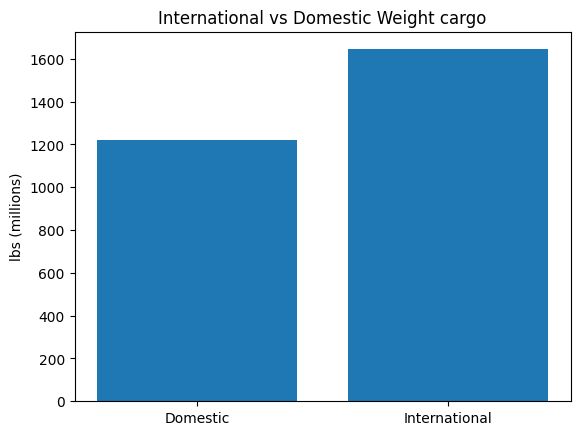

In [26]:

# Plot

fig, ax = plt.subplots()
ax.bar(lbs_per_geosummary.index, lbs_per_geosummary.values)
ax.set_ylabel('lbs (millions)')
ax.set_title('International vs Domestic Weight cargo')

Text(0.5, 1.0, 'International Destination Rank in Lbs')

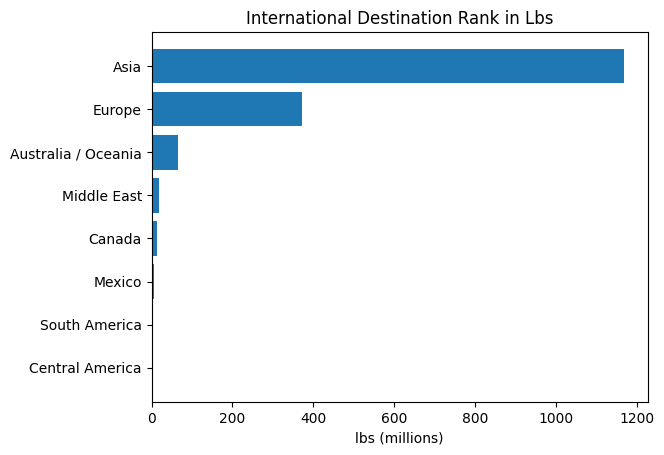

In [27]:
fig1, ax1 = plt.subplots()
ax1.barh(inter_dest.index, inter_dest.values)
ax1.set_xlabel('lbs (millions)')
ax1.set_title('International Destination Rank in Lbs')

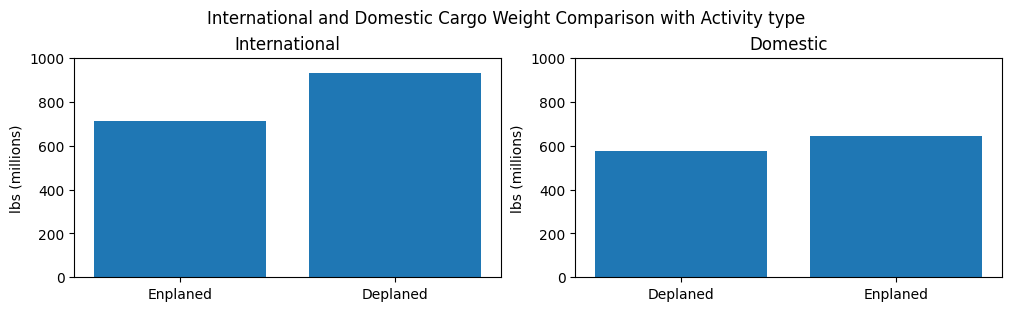

In [28]:

fig2, ax2 = plt.subplots(1, 2, figsize=(10,3), layout='constrained')
fig2.suptitle('International and Domestic Cargo Weight Comparison with Activity type')

ax2[0].bar(inter_dist1.index, inter_dist1.values)
ax2[0].set_title('International')
ax2[1].bar(domestic_dist1.index, domestic_dist1.values)
ax2[1].set_title('Domestic')


for i in range(2):
    ax2[i].set_yticks(np.arange(0, 1001, 200))
    ax2[i].set_ylabel('lbs (millions)')


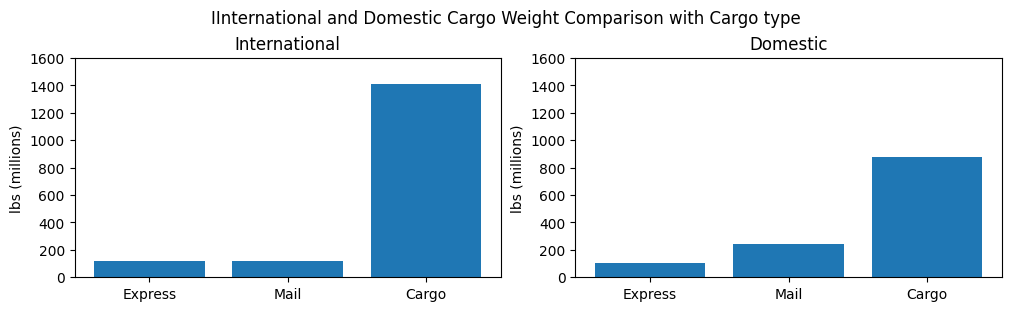

In [29]:
fig3, ax3 = plt.subplots(1, 2, figsize=(10,3), layout='constrained')
fig3.suptitle('IInternational and Domestic Cargo Weight Comparison with Cargo type')

ax3[0].bar(inter_dist2.index, inter_dist2.values)
ax3[0].set_title('International')
ax3[1].bar(domestic_dist2.index, domestic_dist2.values)
ax3[1].set_title('Domestic')

for i in range(2):
    ax3[i].set_yticks(np.arange(0, 1601, 200))
    ax3[i].set_ylabel('lbs (millions)')

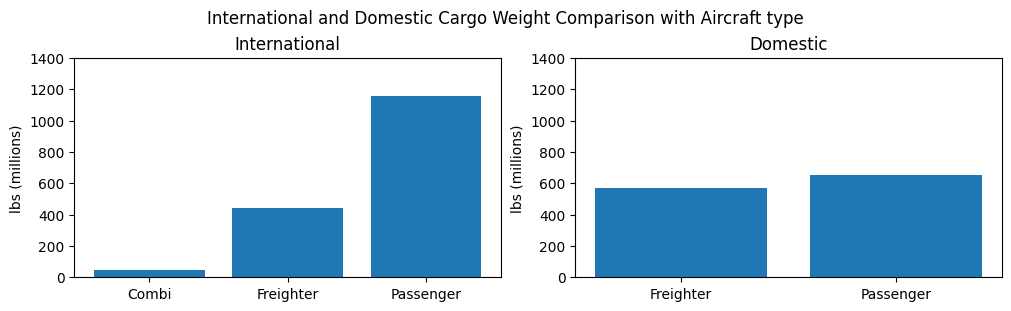

In [30]:
fig4, ax4 = plt.subplots(1, 2, figsize=(10,3), layout='constrained')
fig4.suptitle('International and Domestic Cargo Weight Comparison with Aircraft type')

ax4[0].bar(inter_dist3.index, inter_dist3.values)
ax4[0].set_title('International')
ax4[1].bar(domestic_dist3.index, domestic_dist3.values)
ax4[1].set_title('Domestic')

for i in range(2):
    ax4[i].set_yticks(np.arange(0, 1401, 200))
    ax4[i].set_ylabel('lbs (millions)')

### What aircraft type often fly internationally?

Text(0.5, 1.0, 'Aircraft Type That Often Fly Internationally')

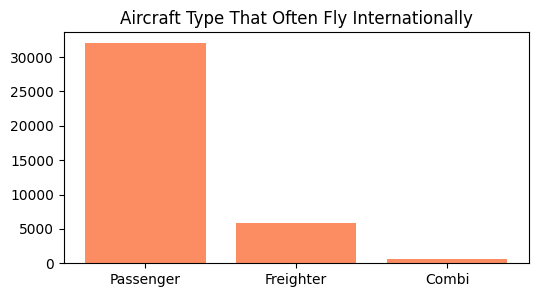

In [31]:
# aircraft type often fly internationaly

## data
aircraft_t = selected_df[selected_df['geo_summary'] == 'International'].aircraft_type.value_counts()

## plot
fig5, ax5 = plt.subplots(figsize=(6,3))

ax5.bar(aircraft_t.index, aircraft_t.values, color='#fc8d62')
ax5.set_title('Aircraft Type That Often Fly Internationally')

### Describe the cargo weight variable and its influence across the data

In [32]:
selected_df.lbs.describe()

count    5.503800e+04
mean     5.204636e+05
std      1.023128e+06
min      1.000000e+00
25%      1.936650e+04
50%      1.442165e+05
75%      5.915170e+05
max      2.381234e+07
Name: lbs, dtype: float64

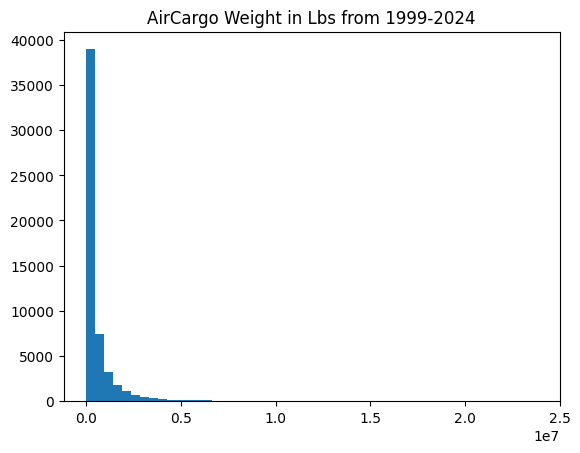

In [33]:
## using matplotlib
plt.hist(selected_df.lbs, bins=50)
plt.title('AirCargo Weight in Lbs from 1999-2024')
plt.show()

In [34]:
## using plotly
px.histogram(selected_df.lbs, nbins=50, title='Airline Cargo weight in Lbs from 1999-2024')